In [ ]:
# Part 1: Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Part 2: Load and preprocess the MNIST dataset

# Load the dataset (training and testing)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)  # 10 classes (digits 0-9)
y_test = to_categorical(y_test, 10)

# Check the shape of the data
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
# Part 3: Build the neural network model

# Initialize the neural network model
model = Sequential()

# Flatten the input (28x28 image pixels to 1D array of 784)
model.add(Flatten(input_shape=(28, 28)))

# Add a dense hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add another dense hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Add the output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8690 - loss: 0.4502 - val_accuracy: 0.9621 - val_loss: 0.1333
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9641 - loss: 0.1177 - val_accuracy: 0.9680 - val_loss: 0.1109
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9764 - loss: 0.0762 - val_accuracy: 0.9691 - val_loss: 0.1042
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9829 - loss: 0.0537 - val_accuracy: 0.9735 - val_loss: 0.0889
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9867 - loss: 0.0406 - val_accuracy: 0.9718 - val_loss: 0.1051
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9885 - loss: 0.0350 - val_accuracy: 0.9744 - val_loss: 0.0951
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9916 - loss: 0.0255 - val_accuracy: 0.9728 - val_loss: 0.1034
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9914 - loss: 0.

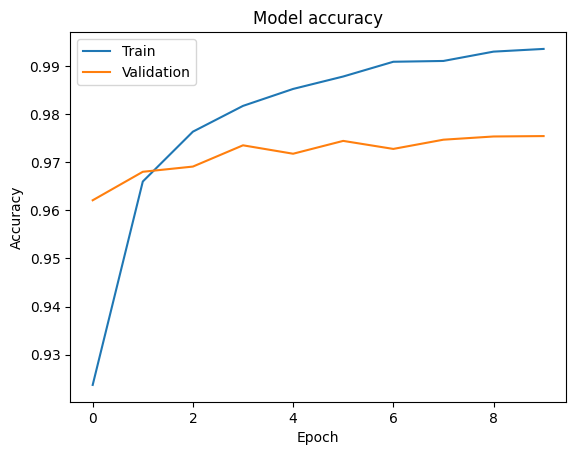

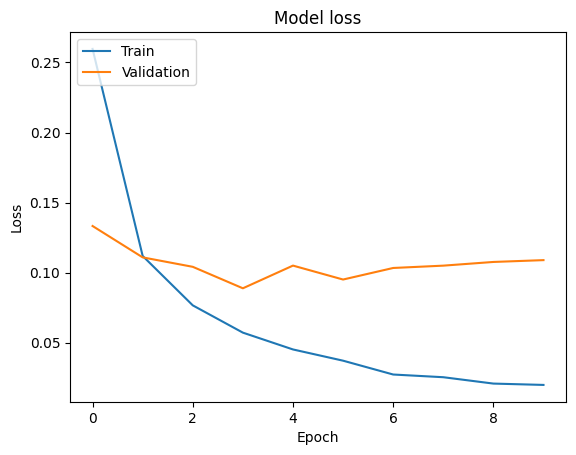

In [ ]:
# Part 4: Train the model

# Train the model for 10 epochs with batch size of 32
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.1131
Test Accuracy: 97.75%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


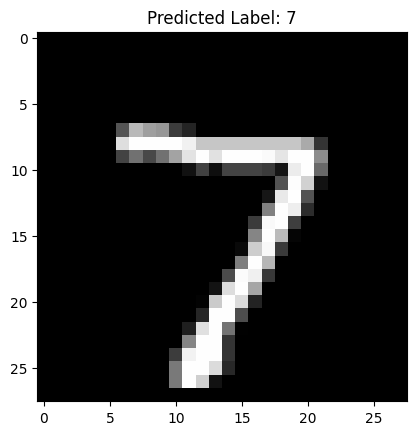

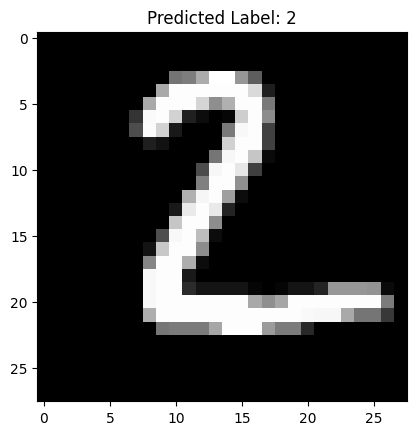

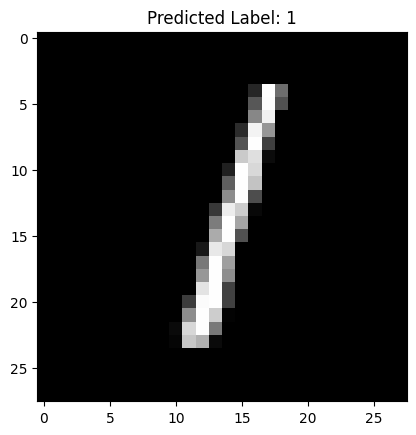

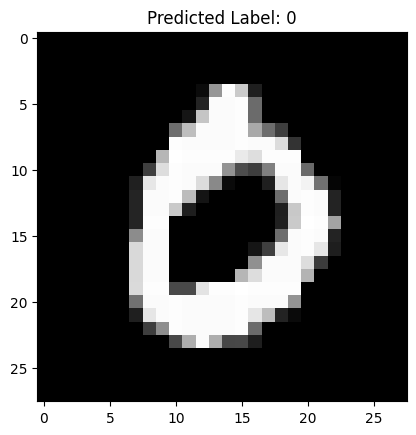

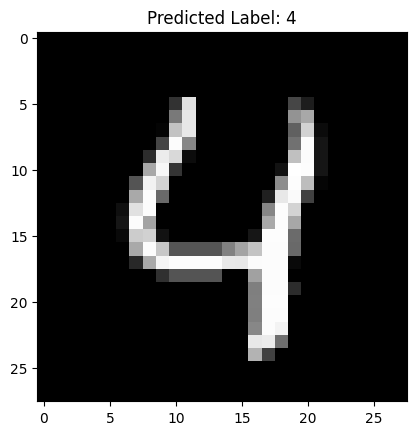

In [ ]:
# Part 5: Evaluate the model on test data

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict on the test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Show some test images and their predicted labels
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Predicted Label: {predicted_classes[i]}')
    plt.show()
